In [1]:
import random 
random.seed(3456)
from v2.ddqn_agent import DDQNAgent

Using TensorFlow backend.


In [2]:
num_coins_per_order = 0 #0 means buy/sell all per order
recent_k = 150

In [3]:
dummy = DDQNAgent(recent_k = 150, num_coins_per_order = num_coins_per_order, coin_name = "jason_always_buy",
                     external_states = ["rolling_mean"],
                     internal_states = [])

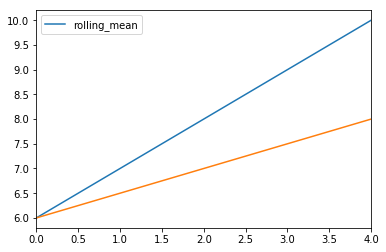

In [9]:
dummy.env.plot(states_to_plot=["current_price", "rolling_mean"])

In [5]:
dummy.train(num_episodes=300)

episode: 1/300, returns: 12.5, epsilon: 1.0
episode: 2/300, returns: 12.5, epsilon: 1.0
episode: 3/300, returns: 0.0, epsilon: 1.0
episode: 4/300, returns: 42.8571428571, epsilon: 1.0
episode: 5/300, returns: 50.0, epsilon: 1.0
episode: 6/300, returns: 0.0, epsilon: 1.0
episode: 7/300, returns: 66.6666666667, epsilon: 1.0
episode: 8/300, returns: 66.6666666667, epsilon: 0.99
episode: 9/300, returns: 16.6666666667, epsilon: 0.98
episode: 10/300, returns: 31.25, epsilon: 0.97
episode: 11/300, returns: 66.6666666667, epsilon: 0.96
episode: 12/300, returns: 28.5714285714, epsilon: 0.95
episode: 13/300, returns: 12.5, epsilon: 0.94
episode: 14/300, returns: 50.0, epsilon: 0.93
episode: 15/300, returns: 0.0, epsilon: 0.92
episode: 16/300, returns: 11.1111111111, epsilon: 0.91
episode: 17/300, returns: 48.1481481481, epsilon: 0.9
episode: 18/300, returns: 66.6666666667, epsilon: 0.9
episode: 19/300, returns: 33.3333333333, epsilon: 0.89
episode: 20/300, returns: 66.6666666667, epsilon: 0.88
e

episode: 166/300, returns: 0.0, epsilon: 0.2
episode: 167/300, returns: 0.0, epsilon: 0.2
episode: 168/300, returns: 66.6666666667, epsilon: 0.2
episode: 169/300, returns: 48.1481481481, epsilon: 0.2
episode: 170/300, returns: 48.1481481481, epsilon: 0.19
episode: 171/300, returns: 66.6666666667, epsilon: 0.19
episode: 172/300, returns: 66.6666666667, epsilon: 0.19
episode: 173/300, returns: 0.0, epsilon: 0.19
episode: 174/300, returns: 66.6666666667, epsilon: 0.19
episode: 175/300, returns: 66.6666666667, epsilon: 0.18
episode: 176/300, returns: 42.8571428571, epsilon: 0.18
episode: 177/300, returns: 28.5714285714, epsilon: 0.18
episode: 178/300, returns: 42.8571428571, epsilon: 0.18
episode: 179/300, returns: 66.6666666667, epsilon: 0.18
episode: 180/300, returns: 66.6666666667, epsilon: 0.18
episode: 181/300, returns: 66.6666666667, epsilon: 0.17
episode: 182/300, returns: 48.1481481481, epsilon: 0.17
episode: 183/300, returns: 66.6666666667, epsilon: 0.17
episode: 184/300, returns:

In [6]:
dummy.print_my_memory()

[6.0]_Action.BUY_0.0_[6.0]_False
138


[6.0]_Action.BUY_0.0_[6.5]_False
33


[6.0]_Action.BUY_16.6666666667_[6.5]_False
104


[6.0]_Action.HOLD_0.0_[6.0]_False
66


[6.0]_Action.HOLD_0.0_[6.5]_False
47


[6.0]_Action.HOLD_16.6666666667_[6.5]_False
15


[6.0]_Action.SELL_0.0_[6.0]_False
96


[6.0]_Action.SELL_0.0_[6.5]_False
82


[6.0]_Action.SELL_16.6666666667_[6.5]_False
19


[6.5]_Action.BUY_0.0_[7.0]_False
24


[6.5]_Action.BUY_14.2857142857_[7.0]_False
113


[6.5]_Action.HOLD_0.0_[7.0]_False
35


[6.5]_Action.HOLD_14.2857142857_[7.0]_False
16


[6.5]_Action.SELL_0.0_[7.0]_False
89


[6.5]_Action.SELL_14.2857142857_[7.0]_False
23


[7.0]_Action.BUY_-1.42108547152e-14_[7.5]_False
9


[7.0]_Action.BUY_0.0_[7.5]_False
22


[7.0]_Action.BUY_12.5_[7.5]_False
113


[7.0]_Action.HOLD_-1.42108547152e-14_[7.5]_False
1


[7.0]_Action.HOLD_0.0_[7.5]_False
37


[7.0]_Action.HOLD_12.5_[7.5]_False
15


[7.0]_Action.SELL_-1.42108547152e-14_[7.5]_False
2


[7.0]_Action.SELL_0.0_[7.5]_False
76


[7.

In [10]:
print dummy.model.predict([6.0])

[[ 155.64582825  149.09790039  153.43942261]]


In [11]:
print dummy.model.predict([6.5])

[[ 166.49906921  159.49786377  164.13298035]]


In [12]:
print dummy.model.predict([7.0])

[[ 177.35229492  169.89782715  174.82655334]]


In [13]:
print dummy.model.predict([7.5])

[[ 188.20555115  180.29777527  185.52011108]]


In [14]:
print dummy.model.predict([8.0])

[[ 199.05877686  190.69773865  196.21368408]]


## Thoughts
* is the model really learning something useful here?
* why is it learning such astronomical values? did we do something wrong?
    * so the model should predict the final state correctly right???? why is the 190, 199...etc. wtf

In [25]:
import numpy as np 

def __test_replay(self, batch_size):
        minibatch = random.sample(self.memory, self.batch_size)
        
        for state, action, reward, next_state, isDone in minibatch:
            target = self.model.predict(state)
            if isDone:
                target[0][action.value] = reward
                print "yep!"
                print state, action, reward, next_state, isDone
            else:
                a = self.model.predict(next_state)[0]
                t = self.target_model.predict(next_state)[0]
                target[0][action.value] = reward + self.gamma * t[np.argmax(a)]
            print target
                ## -0.60 + gamma * -0.50
            self.model.train(state, target)
        
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [26]:
__test_replay(dummy, 30)

[[ 157.57722473  176.47685242  157.39427185]]
[[ 149.39407349  149.6885376   157.30841064]]
[[ 168.11868286  182.83666992  168.137146  ]]
[[ 156.97741699  149.32217407  147.93103027]]
[[ 167.69013977  182.83666992  167.90028381]]
[[ 156.61402893  149.12698364  147.93103027]]
[[ 178.86090088  169.82971191  178.5184021 ]]
yep!
[7.5] Action.BUY 11.1111111111 [8.0] True
[[ 189.02650452   11.11111069  189.26925659]]
[[ 191.36090088  169.61196899  178.17651367]]
yep!
[7.5] Action.SELL 0.0 [8.0] True
[[ 188.88230896  179.88265991    0.        ]]
[[ 184.51199341  159.01077271  166.96398926]]
[[ 156.25982666  149.39407349  155.95907593]]
[[ 156.35473633  149.39407349  155.86196899]]
[[ 167.3666687   158.9684906   170.22628784]]
[[ 167.51875305  170.22628784  166.68589783]]
[[ 156.77323914  149.39407349  155.90292358]]
yep!
[7.5] Action.BUY 11.1111111111 [8.0] True
[[ 189.7510376    11.11111069  188.57504272]]
[[ 167.99275208  184.51199341  166.87800598]]
[[ 157.1849823   149.23431396  149.39407